In this demo, we reproduce some key plots in Hwang et al. using the package `binary_sampling`. `binary_sampling` package samples binaries for specific eccentricity distributions, orientation, and random orbital phases. It does not include orbital evolution. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
from matplotlib import rcParams
rcParams.update({'font.size': '18'})
rcParams.update({'font.family': 'sans-serif'})
rcParams.update({'axes.facecolor': 'white'})
rcParams.update({'axes.edgecolor': 'black'})
rcParams.update({'axes.labelcolor': 'black'})
rcParams.update({'xtick.top': 'True'})
rcParams.update({'xtick.major.pad': '6.0'})
rcParams.update({'xtick.color': 'k'})
rcParams.update({'xtick.direction': 'in'})
rcParams.update({'ytick.right': 'True'})
rcParams.update({'ytick.major.pad': '6.0'})
rcParams.update({'ytick.color': 'k'})
rcParams.update({'ytick.direction': 'in'})
rcParams.update({'legend.fontsize': '18'})
rcParams.update({'figure.figsize': '8.0, 6.0'})
rcParams.update({'figure.dpi': '100'})
rcParams.update({'figure.facecolor': 'white'})
rcParams.update({'figure.edgecolor': 'white'})
rcParams.update({'image.cmap': 'rainbow'})

Import the package `binary_sampling`:

In [3]:
from binary_sampling import *

The function `binary()` provides evenly sampled (in time) binary orbit for a single binary. The user can specify the eccentricity (`e`), number of orbital phase sampled (`Nphase`), masses (`m1` and `m2`, with default 1 solar mass), and orientation (default `faceon`=True). `binary()` returns a binary object with computed separation vector (`rx`, `ry`, `rz`) and velocity vector (`vx`, `vy`, `vz`). The object also contains other quantities like `vr_angle`, which is the angle between the projected separation vector (`rx`, `ry`) and the projected velocity vector (`vx`, `vy`).

/Users/Hwang/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


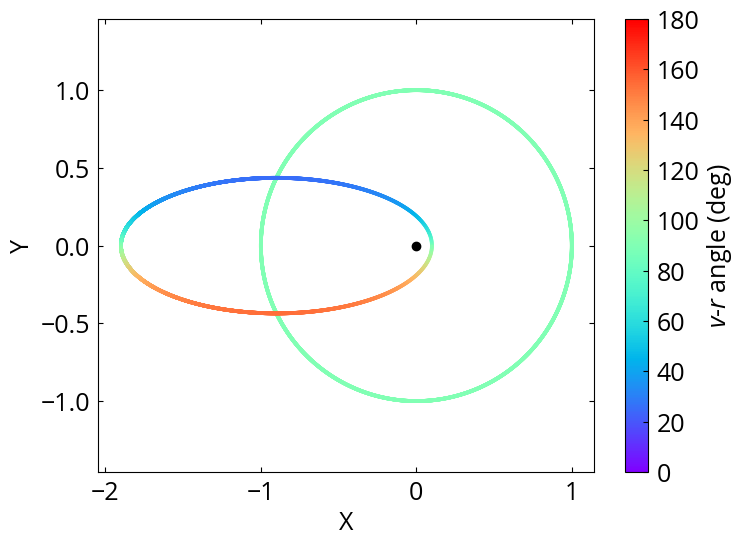

In [5]:
binary0 = binary(e=0., Nphase=5000)
plt.scatter(
    binary0.rx,
    binary0.ry,
    c=binary0.vr_angle,
    s=3,
    vmin=0., vmax=180., label='e=0'
)

binary1 = binary(e=0.9, Nphase=5000)
plt.scatter(
    binary1.rx,
    binary1.ry,
    c=binary1.vr_angle,
    s=3,
    vmin=0., vmax=180., label='e=0.9'
)

plt.colorbar(label=r'$v$-$r$ angle (deg)')

plt.scatter(
    [0], [0], c='k'
)

plt.axes().set_aspect('equal', 'datalim')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


The function `binaries()` provides sampling of a large number (`Nbinary`) of binaries. One can specify the eccentricity distribution using the argument `e_alpha`, where the eccentricity distribution is a power law $f(e)=(1+\alpha) e^\alpha$. Alternatively, one can set all wide binaries to have a single-value eccentricity using `e`. Binary orientation is random (`faceon`=False) by default.


Below, we use the function `binaries()` to sample 1 million binaries (`Nbinary`= 1000000) with a uniform eccentricity distribution (`e_alpha`=0). Then we plot the 2d-histogram for the v-r angles and eccentricities.

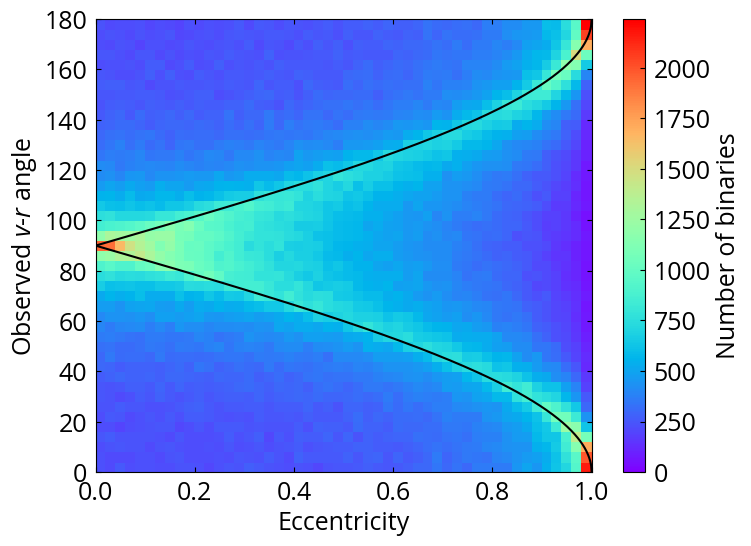

In [6]:

Nbinary = 1000000

binaries_test = binaries(Nbinary=Nbinary, e_alpha=0.)

plt.hist2d(
    binaries_test.e,
    binaries_test.vr_angle.value,
    bins=[np.arange(0., 1.02, 0.02), np.arange(0., 184, 4.)],
    vmin=0, cmap='rainbow'
)


e_list = np.arange(0., 1.001, 0.001)

plt.plot(
    e_list,
    180. / np.pi * np.arccos(e_list),
    c='k', ls='-'
)


plt.plot(
    e_list,
    180. / np.pi * np.arccos(-e_list),
    c='k', ls='-'
)

plt.colorbar(label='Number of binaries')

plt.xlabel('Eccentricity')
plt.ylabel(r'Observed $v$-$r$ angle')

plt.show()


In the following example, we use the function `binaries()` to sample 1 million binaries (`Nbinary`= 1000000) with different eccentricity distributions, including single-value `e=0`, `e=0.8`, and power-law distributions `e_alpha=0`, `e_alpha=1`, and `e_alpha=4`.  By default, `binaries()` consider random binary orientation (`faceon=False`).

For `Nbinary=1e6`, the following code may take about 1 minute.

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


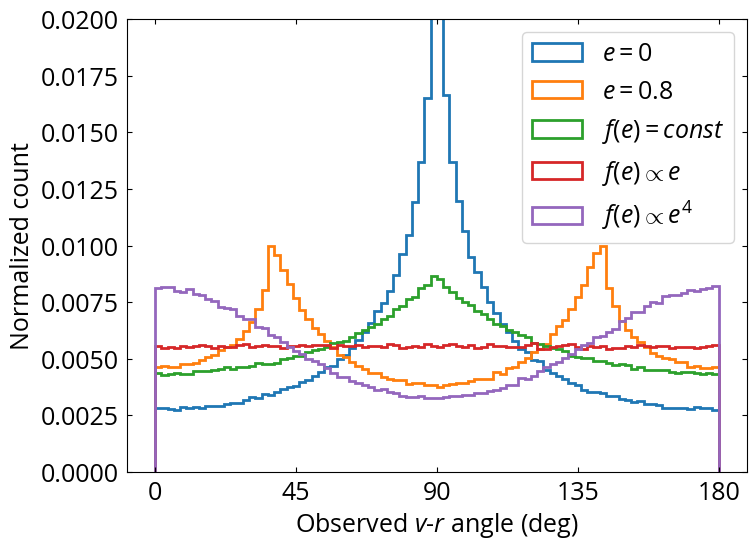

In [8]:


Nbinary = 1000000
bins = np.arange(0., 182., 2.)

binaries_0 = binaries(Nbinary=Nbinary, e=0.)

plt.hist(
    binaries_0.vr_angle.value,
    histtype='step', density=1,
    bins=bins,
    label=r'$e=0$', lw=2
)

binaries_0 = binaries(Nbinary=Nbinary, e=0.8)
    
plt.hist(
    binaries_0.vr_angle.value,
    histtype='step', density=1,
    bins=bins,
    label=r'$e=0.8$', lw=2
)

binaries_0 = binaries(Nbinary=Nbinary, e_alpha=0.)
    
plt.hist(
    binaries_0.vr_angle.value,
    histtype='step', density=1,
    bins=bins,
    label=r'$f(e)=const$', lw=2
)

binaries_0 = binaries(Nbinary=Nbinary, e_alpha=1.)
    
plt.hist(
    binaries_0.vr_angle.value,
    histtype='step', density=1,
    bins=bins,
    label=r'$f(e)\propto e$', lw=2
)

binaries_0 = binaries(Nbinary=Nbinary, e_alpha=4)
    
plt.hist(
    binaries_0.vr_angle.value,
    histtype='step', density=1,
    bins=bins,
    label=r'$f(e)\propto e^{4}$', lw=2
)


plt.xlabel(r'Observed $v$-$r$ angle (deg)')
plt.ylabel('Normalized count')
plt.legend(loc='upper right')
plt.xticks([0., 45, 90, 135, 180])

plt.ylim(0., 0.02)
plt.show()